<a href="https://colab.research.google.com/github/noelfischer/mldm_praktika/blob/main/L04_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In this lab you will apply logistic regression to a dataset of images with the goal of classifying each image as a smile (1) or non-smile (0). We are using a dataset of faces called GENKI.
First, we  download the dataset and explore it.



In [2]:
# Download dataset
# Note: this only needs to be done once!
if not os.path.exists("trainingLabels.npy"):
  !wget https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/trainingFaces.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingFaces.npy

--2024-10-11 08:45:46--  https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.222.16, 54.231.198.200, 52.216.239.117, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.222.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [binary/octet-stream]
Saving to: ‘trainingLabels.npy’

trainingLabels.npy  100%[===================>]  15.70K  --.-KB/s    in 0.001s  

2024-10-11 08:45:46 (22.9 MB/s) - ‘trainingLabels.npy’ saved [16080/16080]

--2024-10-11 08:45:46--  https://s3.amazonaws.com/jrwprojects/testingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.40.136, 54.231.129.88, 52.217.103.70, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.40.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [binary/octet-stream]
Saving to: ‘testingLabels.npy’

testingLabels.npy   100%[===================>]  14.36K  --.-KB/s    in 0s  

In [3]:
# Load dataset
trainingFaces = np.load("trainingFaces.npy")
trainingLabels = np.load("trainingLabels.npy")
testingFaces = np.load("testingFaces.npy")
testingLabels = np.load("testingLabels.npy")
# Print out the dimensions of the arrays
print("trainingFaces shape: ", trainingFaces.shape)
print("trainingLabels shape: ", trainingLabels.shape)
print("testingFaces shape: ", testingFaces.shape)
print("testingLabels shape: ", testingLabels.shape)
# Print out basic statistics
print("Proportion 'smile' in training:", trainingLabels.mean())  # Proportion of training faces that are "smile"
print("Proportion 'smile' in testing:", testingLabels.mean())  # Proportion of testing faces that are "smile"

trainingFaces shape:  (2000, 576)
trainingLabels shape:  (2000,)
testingFaces shape:  (1828, 576)
testingLabels shape:  (1828,)
Proportion 'smile' in training: 0.5355
Proportion 'smile' in testing: 0.5464989059080962


The labels are binary (1 = smile, 0 = non-smile). The images are stored as arrays of grayscale pixel values (each image contains 24*24 = 576 total pixels).

Let's visualize some of the faces. We first have to reshape each image from a 576-dimensional vector (which is convenient for classification with logistic regression) to a 24x24 array (which is convenient for visualization):

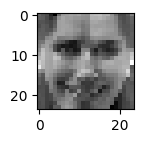

label:  1


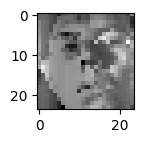

label:  0


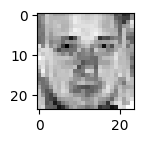

label:  0


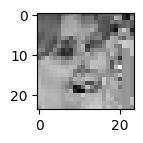

label:  1


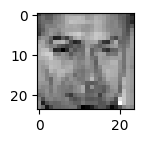

label:  1


In [4]:
for i in range(5):
  # Before rendering, we have to reshape the image vector into a 2-d array
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(trainingFaces[i,:].reshape(24, 24), cmap='gray')
  plt.show()
  print("label: ", trainingLabels[i])

In most of the images, the label (smile vs. non-smile) is quite clear. However, in some it is not. Examine the 4 images below, and ask yourself: how would *you* classify them? (Note: you do not need to answer on Moodle.)

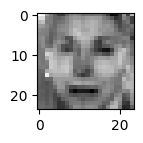

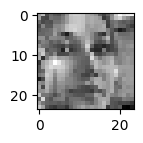

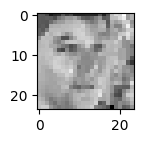

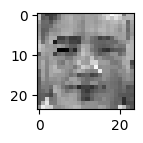

In [5]:
ambiguousIdxs = [ 187, 192, 566, 1401 ]
for idx in ambiguousIdxs:
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(testingFaces[idx,:].reshape(24, 24), cmap='gray')
  plt.show()

## Task 1a: Logistic Regression for Smile Classification (1 Point)

**Your task**: Train a logistic regression classifier (use the LogisticRegression class in sklearn) on the entire training dataset, and measure its accuracy (proportion of correctly classified images) on  the testing data.

In [6]:
import sklearn.linear_model
from sklearn.metrics import accuracy_score

logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)

# TODO: implement the rest here
logisticRegressor.fit(trainingFaces, trainingLabels)
predictions = logisticRegressor.predict(testingFaces)
accuracy = accuracy_score(testingLabels, predictions)

print(f"Accuracy on testing data: {accuracy:.4f}")

Accuracy on testing data: 0.7533


📢 **HAND-IN** 📢:
Enter the testing accuracy of the trained model on Moodle.

## Task 1b: Measure the Effect of Training Set Size on Training & Testing Accuracies (4 pts)
As a general rule: the more training data you have, the higher your testing accuracy will be. In this next task, you will explore this issue quantitatively.

**Your task**: Using the provided training and test data, experiment with how the size of the training set impacts the test accuracy. In particular, vary M over 100, 200, 300, ..., 2000. For each M, train a logistic regression classifier  containing M training examples (just use the first M examples) to recognize a smile (1) or non-smile (0). Then, measure *training* accuracy of the trained classifier (i.e., just the M examples you actually trained on) as well as the *test* accuracy (proportion of examples classified correctly). Plot these two curves in the same plot as a function of M. Why do you think the curves look the way they do?

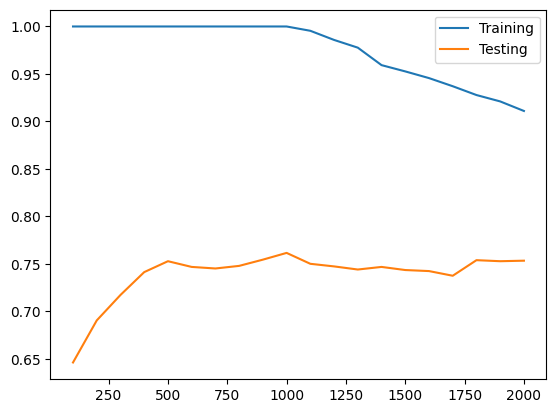

In [ ]:
import sklearn.linear_model

trainingAccuracies = []
testingAccuracies = []
Mvalues = np.arange(100, 2001, 100)
for M in Mvalues:
  logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
  # TODO: implement the rest here
  logisticRegressor.fit(trainingFaces[:M, :], trainingLabels[:M])
  trainPredictions = logisticRegressor.predict(trainingFaces[:M, :])
  trainAccuracy = accuracy_score(trainingLabels[:M], trainPredictions)

  trainingAccuracies.append(trainAccuracy)  # TODO: change this


  testPredictions = logisticRegressor.predict(testingFaces)
  testAccuracy = accuracy_score(testingLabels, testPredictions)
  testingAccuracies.append(testAccuracy)  # TODO: change this

plt.plot(Mvalues, trainingAccuracies)
plt.plot(Mvalues, testingAccuracies)
plt.legend([ "Training", "Testing" ])
plt.show()

# Training Accuracy Curve: With small values of M, the model can "memorize" the training set, leading to high accuracy. As M increases, training accuracy slightly decreases due to improved generalization.
# Testing Accuracy Curve: For small M, the model underfits, resulting in low testing accuracy. As M increases, testing accuracy improves, indicating better generalization. At M=500, testing accuracy plateaus, showing diminishing returns from additional training data.

📢 **HAND-IN** 📢:
On Moodle, upload your plot.

## Task 2a: Examining the "Worst" Mistakes (2 pts)
You can sometimes learn something  about both the dataset and a trained model by examining its "worst"  mistakes, i.e., examples on which the model is *highly confident* but *wrong*.  For this purpose, you can call the LogisticRegressor.predict_proba function, which returns a probability in the interval (0,1) rather than a binary prediction.

**Your task**:
Find the top 25 *positively-labeled* examples in the test set on which the trained classifier (using M=2000) was *most confident* but *wrong*, i.e., yhat nearest to 0. Show these images and the machine's probability estimate yhat. Do the same thing for the top 25 *negatively-labeled* examples in the test set on which yhat was closest to 1.

What do you observe about these particular examples and their labels?

In [7]:
# Utility method to plot the faces whose indices are specified in idxs
def show (idxs):
  for idx in idxs:
    fig, ax = plt.subplots(figsize=(1.25, 1.25))
    ax.imshow(testingFaces[idx,:].reshape(24,24), cmap='gray')
    plt.show()
    print(testingLabels[idx], yhat[idx])

Positive


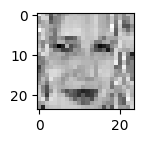

1 2.8653308286663735e-06


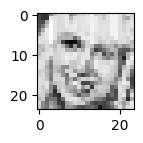

1 6.584852968696101e-05


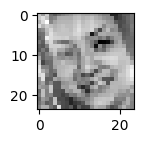

1 9.039454365670211e-05


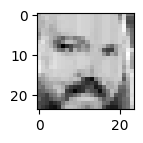

1 0.00011734495198917338


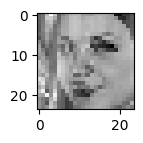

1 0.00025952893666201095


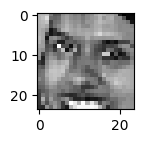

1 0.00030186658933838856


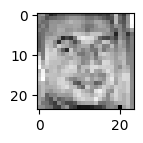

1 0.00030188162472926424


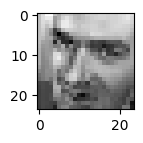

1 0.00042541056883285114


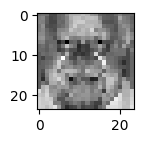

1 0.00047338837872090234


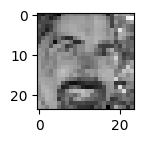

1 0.00047456526526878755


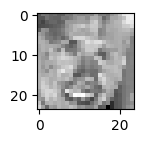

1 0.0004888920333874603


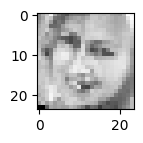

1 0.0005870320635523547


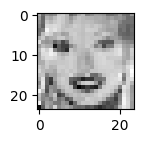

1 0.000638969891613633


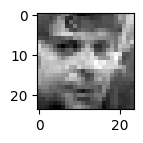

1 0.0008065862716113401


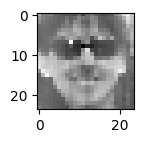

1 0.000885250836698291


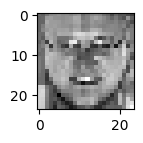

1 0.0009226894071711437


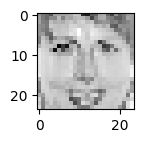

1 0.000977222229551294


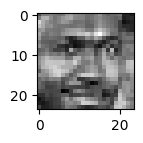

1 0.000993359975307156


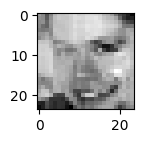

1 0.0013143646918381499


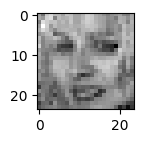

1 0.0014552643083248688


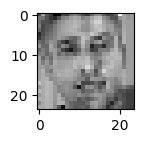

1 0.0016545032903903104


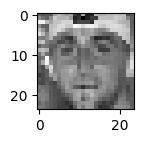

1 0.0017767212415850757


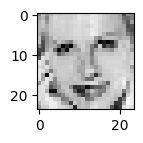

1 0.001794769436630841


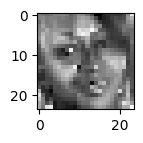

1 0.0022463015876477664


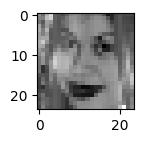

1 0.0023311691340072464
Negative


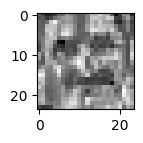

0 0.9999999934344179


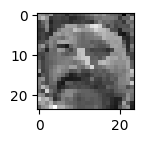

0 0.9999912196102063


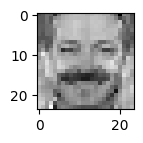

0 0.9999910879235114


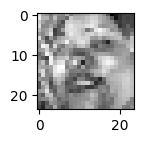

0 0.9999793416329824


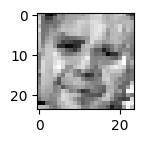

0 0.9999632787698752


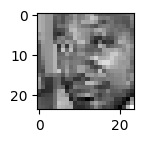

0 0.9999586771831219


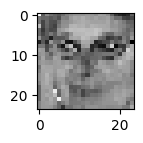

0 0.9998906134133526


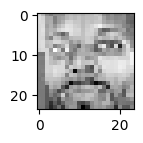

0 0.999871278853428


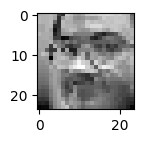

0 0.9998615924973431


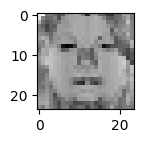

0 0.9997970514477309


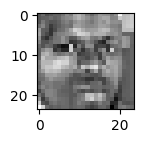

0 0.9996617424625838


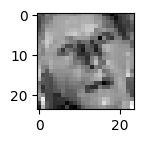

0 0.9996391947688377


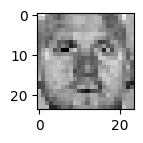

0 0.9994842392849547


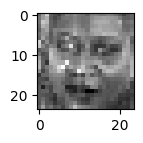

0 0.9992713219827204


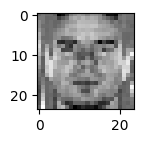

0 0.9989890142121034


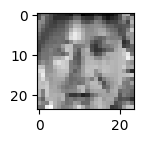

0 0.9989882477215083


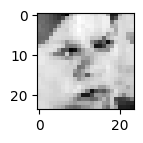

0 0.9989310050458291


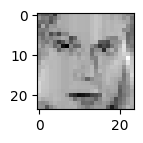

0 0.9986070005271457


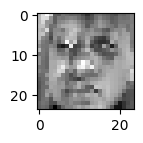

0 0.9985908645075735


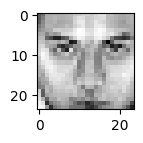

0 0.9985801364181051


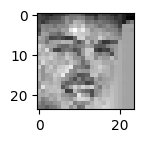

0 0.9983093226788852


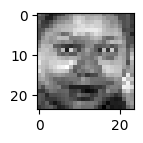

0 0.9982978374603814


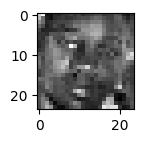

0 0.998060923269284


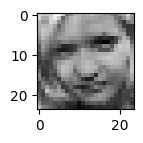

0 0.9977895851145802


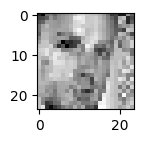

0 0.9972106056358475


In [8]:
# In the line below, ",1" picks out the probability of the positive class (smile)
yhat = logisticRegressor.predict_proba(testingFaces)[:,1]

print("Positive")
# TODO: find the top 25 least worst mistakes for the positive examples
positive_idxs = np.where(testingLabels == 1)[0]
positive_confidence_errors = positive_idxs[np.argsort(yhat[positive_idxs])][:25]
show(positive_confidence_errors)


print("Negative")
# TODO: find the top 25 least worst mistakes for the negative examples
negative_idxs = np.where(testingLabels == 0)[0]
negative_confidence_errors = negative_idxs[np.argsort(-yhat[negative_idxs])][:25]
show(negative_confidence_errors)

📢 **HAND-IN** 📢:
On Moodle, offer an explanation (referring to specific attributes of the faces, e.g., eye-glasses, lighting, etc.) about why those particular images were highly confident but incorrectly classified.

Some of the pictures are really difficult to distinguish, even for humans. Some of the mispredicted smiles look like a smile while being labeled as 0 (no smile). So some of the dataset may be wrongly labeled. Other reasons may be bad/uncommon lighting, confusing the model. Glasses also confused the model also because they are uncommon.

## Task 2b: Finding Least Confidently Predicted Examples
It can be instructive to find examples on which the trained classifier is uncertain/not confident. For this purpose, you can call the LogisticRegressor.predict_proba, which returns a probability in the interval (0,1) rather than a binary probability.

**Your task**:
Find the top 25 examples in the test set on which the trained classifier (using M=2000) was *least confident* (i.e., yhat closest to 0.5) in its prediction. Show these images, the machine's probabilistic prediction, and the true label. Do you see any reason why those images might cause the machine some "confusion"? (Note: there may not be an obvious answer, but you can still speculate.)

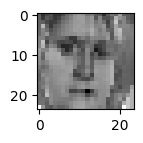

0 0.5001887090387149


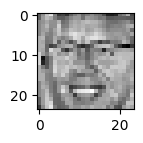

1 0.499672448648487


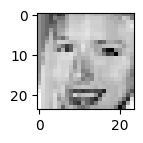

1 0.4994030020334776


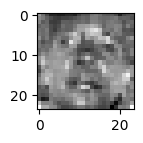

0 0.4993498589094155


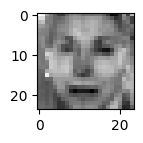

0 0.5010708191479116


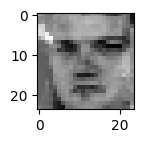

0 0.5026043507103819


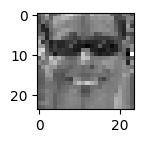

1 0.4946210444631107


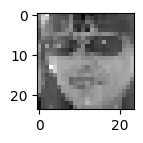

1 0.5064014129323581


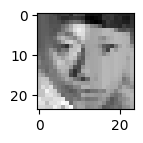

0 0.5065823174979714


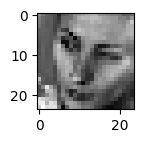

0 0.507189123721959


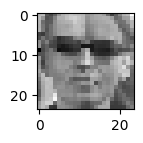

0 0.4912819489045818


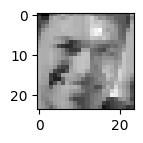

1 0.4909508116222368


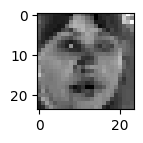

0 0.4898380635412316


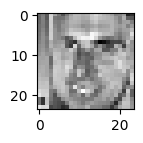

1 0.48782856607056463


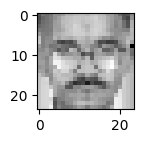

0 0.5122117969774703


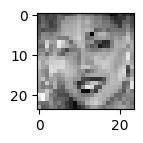

1 0.5142513354077455


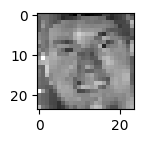

1 0.4833277062222674


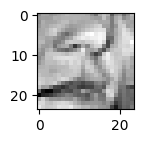

0 0.48310765210407725


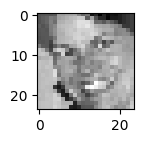

1 0.5195079931183959


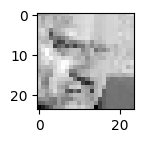

0 0.5195638226652826


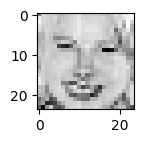

1 0.5197013281018501


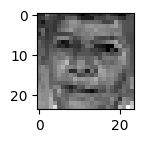

0 0.4790707161844685


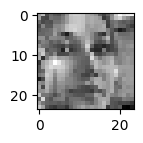

0 0.5215740709927227


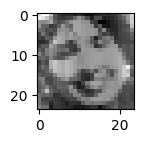

1 0.47809743948611794


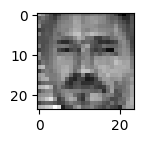

0 0.5221806625018329


In [9]:
# TODO: find 25 least confidently predicted examples

least_confident_idxs = np.argsort(np.abs(yhat - 0.5))[:25]
show(least_confident_idxs)

You do not need to submit anything on Moodle for this task.

# Task 3: Data Augmentation (3 pts)
A perennial problem in machine learning is the lack of sufficient training data. One way to increase the amount of training data is to use **data augmentation**, i.e., to synthetically create more training examples from the ones that already exist. While this is possible only in certain situations, it can be very powerful. One setting in which it often is possible is when working with images. Face images in particular have a special kind of symmetry: if you "flip" a face left-to-right, then the person's facial expression basically remains the same.  This means that, by flipping a face image left-to-right, we can create another face image with the same training label -- *without* having to manually photograph and label that example ourselves.

Below is a Python function that takes an array (M x 576) of face images and returns another array of the same size and contents, except that all the images have been flipped left-to-right.

In [10]:
def flip (faces):
    faces = np.atleast_3d(faces)
    faces = faces.reshape(-1, 24, 24)  # convert faces from vectors to 2-d arrays
    faces = faces[:, :, ::-1]  # flip all the 2-d arrays left-to-right
    return faces.reshape(-1, 24**2)  # convert faces from 2-d arrays to vectors

*Here*'s an example of an original and a flipped face:

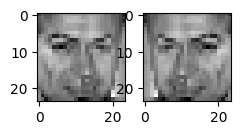

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(2.5, 2.5))
ax[0].imshow(trainingFaces[4,:].reshape(24, 24), cmap='gray')
ax[1].imshow(flip(trainingFaces[4,:]).reshape(24, 24), cmap='gray')
plt.show()

**Your task**: Using the flip function, try training on a larger dataset: the original training set was just 2000 images, but with this data augmentation technique, we can get up to 4000 images. Does training on this larger dataset improve testing accuracy? Create a plot similar to the one you made for Task 1b, but this time vary M up to 4000.

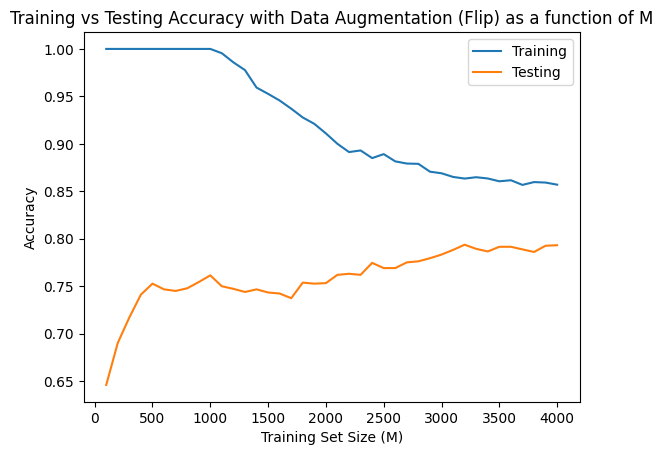

In [12]:
# TODO: apply data augmentation and create plot, similar to Task 1b.

# Apply data augmentation (flipping) to the training set
flippedFaces = flip(trainingFaces)

# Combine the original training set with the flipped set
augmentedTrainingFaces = np.vstack([trainingFaces, flippedFaces])
augmentedTrainingLabels = np.hstack([trainingLabels, trainingLabels])  # Labels remain the same


# Initialize lists to store accuracies
trainingAccuracies = []
testingAccuracies = []

# Values of M to experiment with, up to 4000 now
Mvalues = np.arange(100, 4001, 100)

# Loop over different training set sizes, up to 4000
for M in Mvalues:
    # Step 1: Train on the first M augmented training examples
    logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)

    # Use the first M training samples from the augmented set
    logisticRegressor.fit(augmentedTrainingFaces[:M, :], augmentedTrainingLabels[:M])

    # Step 2: Compute training accuracy on the first M examples
    trainPredictions = logisticRegressor.predict(augmentedTrainingFaces[:M, :])
    trainAccuracy = accuracy_score(augmentedTrainingLabels[:M], trainPredictions)
    trainingAccuracies.append(trainAccuracy)

    # Step 3: Compute testing accuracy on the full test set
    testPredictions = logisticRegressor.predict(testingFaces)
    testAccuracy = accuracy_score(testingLabels, testPredictions)
    testingAccuracies.append(testAccuracy)

# Step 4: Plot the results
plt.plot(Mvalues, trainingAccuracies, label="Training Accuracy")
plt.plot(Mvalues, testingAccuracies, label="Testing Accuracy")
plt.xlabel("Training Set Size (M)")
plt.ylabel("Accuracy")
plt.legend(["Training", "Testing"])
plt.title("Training vs Testing Accuracy with Data Augmentation (Flip) as a function of M")
plt.show()

📢 **HAND-IN** 📢:
On Moodle, upload your plot (where M ranges up to 4000).

# Task 4: Pushing the Limits (4 pts)
Now that you've trained a logistic regression classifier on this task, see how far you can "push the limit" and train as accurate a classifier as possible. This task is open-ended: you can try hyperparameter optimization, new forms of data augmentation, or other techniques.

*Hyperparameter tuning*: You may be able to increase the accuracy by optimizing the amount of regularization. In sklearn, the regularization strength of the logistic regression classifier can be tuned by setting the C parameter in the constructor of LogisticRegression. To optimize hyperparameters in a principled way, we need three data sets: training, validation, and testing. However, the data you are provided with contains just training and testing sets. Hence, you should sub-divide the training data into two subsets: "real" training (this is what you call fit() on), and validation (which you use to estimate how good each hyperparameter configuration is). As a suggestion, try using 80% of trainingFaces and trainingLabels for training, and the remaining 20% for validation.

*Data augmentation*: In addition to left-right flips, you can also try adding a small amount of (typically Gaussian) random noise to each pixel (using a small standard deviation of the Gaussian distribution, so that the face images still looks like a face). See np.random.randn. In order to avoid manually overfitting to the test data, you should also experiment with different forms of data augmentation on a separate validation set; then, once you find a good method of augmentation, test out the resulting classifier on the testing set.

📢 **HAND-IN** 📢:
On Moodle, upload your code above, and report the final testing accuracy.

Code for Hyperparameter Tuning:

In [15]:
from sklearn.model_selection import train_test_split

# Split training data into 80% training and 20% validation
trainFaces, valFaces, trainLabels, valLabels = train_test_split(trainingFaces, trainingLabels, test_size=0.2, random_state=42)

# Hyperparameter tuning: Try different values of the regularization parameter C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_C = None
best_val_accuracy = 0

for C in C_values:
    # Train logistic regression with the current value of C
    logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500, C=C)
    logisticRegressor.fit(trainFaces, trainLabels)

    # Evaluate on the validation set
    val_predictions = logisticRegressor.predict(valFaces)
    val_accuracy = accuracy_score(valLabels, val_predictions)
    print(f"C={C}, Validation Accuracy: {val_accuracy}")

    # Keep track of the best performing C value
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_C = C

print(f"Best C value: {best_C} with Validation Accuracy: {best_val_accuracy}")

# Train final model on the full training set with the best C value
combined_trainFaces = np.vstack([trainFaces, valFaces])
combined_trainLabels = np.hstack([trainLabels, valLabels])

final_model = sklearn.linear_model.LogisticRegression(max_iter=500, C=best_C)
final_model.fit(combined_trainFaces, combined_trainLabels)

# Evaluate on the test set
test_predictions = final_model.predict(testingFaces)
test_accuracy = accuracy_score(testingLabels, test_predictions)
print(f"Test Accuracy with C={best_C}: {test_accuracy}")


C=0.001, Validation Accuracy: 0.7825
C=0.01, Validation Accuracy: 0.785
C=0.1, Validation Accuracy: 0.76
C=1, Validation Accuracy: 0.72
C=10, Validation Accuracy: 0.685
C=100, Validation Accuracy: 0.6825
Best C value: 0.01 with Validation Accuracy: 0.785
Test Accuracy with C=0.01: 0.8167396061269147
